### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. You should not need to create any new cells in the notebook, but feel free to do it if convenient for you.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may be corrupted if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Fill in your group number and the full names of the members in the cell below;
8. Make sure that you are not running an old version of IPython (we provide you with a cell that checks this, make sure you can run it without errors).

Failing to meet any of these requirements might lead to either a subtraction of POEs (at best) or a request for resubmission (at worst).

We advise you the following steps before submission for ensuring that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use Google Cloud's GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

---

Group number and member names:

In [5]:
GROUP = ""
NAME1 = ""
NAME2 = ""

Make sure you can run the following cell without errors.

In [6]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

---

# Home Assignment 3
This home assignment will focus on reinforcement learning and deep reinforcement learning. The first part will cover value-table reinforcement learning techniques, and the second part will include neural networks as function approximators, i.e. deep reinforcement learning. 

When handing in this assignment, make sure that you're handing in the correct version, and more importantly, *that you do no clear any output from your cells*. We'll use these outputs to aid us when grading your assignment.

## Task 1: Gridworld

In this task, you will implement Value Iteration to solve for the optimal policy, $\pi^*$, and the corresponding state value function, $V^*$.

The MDP you will work with in this assignment is illustrated in the figure below

![title](./grid_world.png) 

The agent starts in one of the squares shown in the above figure, and then proceeds to take actions. The available actions at any time step are: **North, West, South,** and **East**. If an action would make the agent bump into a wall, or one of the black (unreachable) states, it instead does nothing, leaving the agent at the same place it was before.

The reward $\mathcal{R}_s^a$ of being in state $s$ and performing actions $a$ is zero for all states, regardless of the action taken, with the exception of the green and the red squares. For the green square, the reward is always 1, and for the red square, always -1, regardless of the action.

When the agent is either in the green or the red square, it will be transported to the terminal state in the next time step, regardless of the action taken. The terminal state is shown as the white square with the "T" inside.

#### State representation
The notations used to define the states are illustrated in the table below

| $S_0$ | $S_1$ | $S_2$ | $S_3$ | $S_4$ |    |
|-------|-------|-------|-------|-------|----|
| $S_5$ | $S_6$ | $S_7$ | $S_8$ | $S_9$ |    |
| $S_{10}$ | $S_{11}$ | $S_{12}$ | $S_{13}$ | $S_{14}$ | $S_{15}$|

where $S_{10}$ corresponds to the initial state of the environment, $S_4$ and $S_9$ to the green and red states of the environment, and $S_{15}$ to the terminal state.


### Task 1.a: Solve for $V^*(s)$ and $Q^*(s,a)$
For this task all transition probabilities are assumed to be 1 (that is, trying to move in a certain direction will definitely move the agent in the chosen direction), and a discount factor of .9, i.e. $\gamma=.9$.

* Solve for $V^*(S_{10})$ 

**Your answer:** 0.5314

* Solve $Q^*(S_{10},a)$ for all actions

**Your answer:** 0.5314



### Task 1.b Write a mathematical expression relating $V^\pi(s)$ to $Q^\pi(s,a)$ and $\pi(a|s)$


**Your answer:** $V_{\pi}(S)=\sum_{a \in A}\pi(a|s)q_{\pi}(s,a)$


###  Task 1.c: Value Iteration
For this task, the transitions are no longer deterministic. Instead, there is a 0.2 probability that the agent will try to travel in an orthogonal direction of the chosen action (0.1 probability for each of the two orthogonal directions). Note that the Markov decision process is still known and does not have to be learned from experience.

Your task is to implement value iteration and solve for the
* optimal greedy policy $\pi^*(s)$ 
* $V^*(s)$

#### The value iteration algorithm
Value iteration is an iterative algorithm used to compute the optimal value function $V^*(s)$. Each iteration starts with a guess of what the value function is and then uses the Bellman equations to improve this guess iteratively. We can describe one iteration of the algorithm as

$
\textbf{For} ~ s \in {\cal S}:\qquad  \\
\quad V_{k+1}(s) = \underset{a \in {\cal A}}{\text{max}}~ \left( \mathcal{R}_s^a + \gamma \underset{{s'\in \mathcal{S}}}{\sum} \mathcal{P}_{ss'}^a \cdot V_k(s') \right)
$

where $\mathcal{P}_{ss'}^a={\mathrm Pr}[S'=s'\big|S=s,A=a]$ is the probability to transition state $s$ to $s'$ given action $a$.


#### The MDP Python class
The Markov Decision Process you will work with is defined in `gridworld_mdp.py`. In the implementation, the actions are represented by integers as, North = 0, West = 1, South = 2, and East = 3.
To interact with the MDP, you need to instantiate an object as: 


```python
mdp = GridWorldMDP()
```

At your disposal there are a number of instance-functions implemented for you, and presented below:

In [7]:
from gridworld_mdp import *
import numpy as np

help(GridWorldMDP.get_states)

Help on function get_states in module gridworld_mdp:

get_states(self)
    Returns complete set of states for the MDP
    :return: numpy array of shape [num states,]



In [8]:
# The constructor
help(GridWorldMDP.__init__)

Help on function __init__ in module gridworld_mdp:

__init__(self, trans_prob=0.8)
    Initializes an instance of the GridWorldMDP class
    :param trans_prob: transition probabilities (e.g. =1 for deterministic MDP)



In [9]:
help(GridWorldMDP.get_actions)

Help on function get_actions in module gridworld_mdp:

get_actions(self)
    Returns complete set of actions for the MDP
    :return: numpy array of shape [num actions,]



In [10]:
help(GridWorldMDP.state_transition_func)

Help on function state_transition_func in module gridworld_mdp:

state_transition_func(self, s, a)
    Returns the transition probabilities to all states given current state and action
    :param state: current state as integer
    :param action: selected action as integer
    :return: state-transition probabilities, i.e.
     [P[S_0| S=s, A_t=a], P[S_1| S=s, A=a], ..., P[S_14| S=s, A=a]]



In [11]:
help(GridWorldMDP.reward_function)

Help on function reward_function in module gridworld_mdp:

reward_function(self, s, a)
    Returns the reward r(s,a)
    :param state: current state as integer
    :param action: selected action as integer
    :return: r(s,a)



We also provide two helper functions for visualizing the value function and the policies you obtain:

In [12]:
# Function for printing a policy pi
def print_policy(pi):
    print('Policy for non-terminal states: ')
    indencies = np.arange(1, 16)
    txt = '| '
    hor_delimiter = '---------------------'
    print(hor_delimiter)
    for a, i in zip(pi, indencies):
        txt += mdp.act_to_char_dict[a] + ' | '
        if i % 5 == 0:
            print(txt + '\n' + hor_delimiter)
            txt = '| '
    print('                            ---')
    print('Policy for terminal state: |', mdp.act_to_char_dict[pi[15]],'|')
    print('                            ---')            

# Function for printing a table with of the value function
def print_value_table(values, num_iterations=None):            
    if num_iterations:
        print('Values for non-terminal states after: ', num_iterations, 'iterations \n', np.reshape(values, [3, 5]), '\n')
        print('Value for terminal state:', terminal_value, '\n')
    else: 
        terminal_value = values[-1]
        print('Values for non-terminal states: \n', np.reshape(values[:-1], [3, 5]))
        print('Value for terminal state:', terminal_value, '\n')

Now it's time for you to implement your own version of value iteration to solve for the greedy policy and $V^*(s)$.

In [13]:
def value_iteration(gamma, mdp):
    """
    Returns:
        V - state value table, numpy array of shape (16,)
        pi - greedy policy table, numpy array of shape (16,)
    """
    V = np.zeros([16]) # state value table
    pi = np.zeros([16]) # policy table
    actions = mdp.get_actions()
    ittr = 0

    while True:
        V_before = V.copy()
        for s in mdp.get_states():
            action_values = [mdp.reward_function(s,action) + gamma * np.dot(mdp.state_transition_func(s,action),V) \
                             for action in actions]
            V[s] = max(action_values)
            pi[s] = np.argmax(action_values)
        
        if np.array_equal(V,V_before):
            break

    
    return V, pi


Run your implementation for the deterministic version of our MDP. As a sanity check, compare your analytical solutions with the output from your implementation.

In [14]:
mdp = GridWorldMDP(trans_prob=1.)
v, pi = value_iteration(.9, mdp)
print_value_table(v)
print_policy(pi)

Values for non-terminal states: 
 [[ 0.6561    0.729     0.81      0.9       1.      ]
 [ 0.59049   0.        0.        0.81     -1.      ]
 [ 0.531441  0.59049   0.6561    0.729     0.6561  ]]
Value for terminal state: 0.0 

Policy for non-terminal states: 
---------------------
| E | E | E | E | N | 
---------------------
| N | N | N | N | N | 
---------------------
| N | E | E | N | W | 
---------------------
                            ---
Policy for terminal state: | N |
                            ---


Once your implementation passed the sanity check, run it for the stochastic case, where the probability of an action succeding is 0.8, and 0.2 of moving the agent in an orthogonal direction to the intended. Use $\gamma = .99$.

In [15]:
# Run for stochastic MDP, gamma = .99
mdp = GridWorldMDP()
v, pi = value_iteration(.99, mdp)
print_value_table(v)
print_policy(pi)

Values for non-terminal states: 
 [[ 0.93861973  0.95193393  0.9639533   0.97612443  1.        ]
 [ 0.92691625  0.          0.          0.88371826 -1.        ]
 [ 0.91395196  0.90255605  0.89130223  0.88057656  0.79978972]]
Value for terminal state: 0.0 

Policy for non-terminal states: 
---------------------
| E | E | E | E | N | 
---------------------
| N | N | N | W | N | 
---------------------
| N | W | W | W | S | 
---------------------
                            ---
Policy for terminal state: | N |
                            ---


Does the policy that the algorithm found looks reasonable? For instance, what's the policy for state $S_8$? Is that a good idea? Why?

**Your answer:** Yes, it will keep bouncing against the wall, in order to not end up in the negative state. there is a small probability to go north, which is desirable.


Test your implementation using this function.

In [16]:
test_value_iteration(v, pi)

Passed: state-value test, for gamma=.99
Passed: policy test, for gamma=.99


Run value iteration for the same scenario as above, but now with $\gamma=.9$

In [17]:
# Run for stochastic MDP, gamma = .9
mdp = GridWorldMDP()
v, pi = value_iteration(.001, mdp)
print_value_table(v)
print_policy(pi)

Values for non-terminal states: 
 [[ 4.09845891e-13  5.12256092e-10  6.40192051e-07  8.00080016e-04
   1.00000000e+00]
 [ 3.27942301e-16  0.00000000e+00  0.00000000e+00  8.00720657e-08
  -1.00000000e+00]
 [ 2.66481820e-19  4.10133050e-17  5.12563779e-14  6.40576583e-11
   6.41153621e-15]]
Value for terminal state: 0.0 

Policy for non-terminal states: 
---------------------
| E | E | E | E | N | 
---------------------
| N | N | N | W | N | 
---------------------
| N | E | E | N | S | 
---------------------
                            ---
Policy for terminal state: | N |
                            ---


In [18]:
# Run for stochastic MDP, gamma = .9
mdp = GridWorldMDP()
v, pi = value_iteration(.9, mdp)
print_value_table(v)
print_policy(pi)

Values for non-terminal states: 
 [[ 0.56631445  0.65360208  0.74438015  0.84776628  1.        ]
 [ 0.49725171  0.          0.          0.57185903 -1.        ]
 [ 0.43084446  0.37830245  0.41624465  0.47405641  0.2761765 ]]
Value for terminal state: 0.0 

Policy for non-terminal states: 
---------------------
| E | E | E | E | N | 
---------------------
| N | N | N | N | N | 
---------------------
| N | W | E | N | W | 
---------------------
                            ---
Policy for terminal state: | N |
                            ---


Do you notice any difference between the greedy policy for the two different discount factors. If so, what's the difference, and why do you think this happened?

## Task 2: Q-learning

In the previous task, you solved for $V^*(s)$ and the greedy policy $\pi^*(s)$, with the entire model of the MDP being available to you. This is however not very practical since for most problems we are trying to solve, the model is not known, and estimating the model is quite often a very tedious process which often also requires a lot of simplifications. 

#### Q-learning algorithm
$
\text{Initialize}~Q(s,a), ~ \forall~ s \in {\cal S},~ a~\in {\cal A} \\
\textbf{Repeat}~\text{(for each episode):}\\
\quad \text{Initialize}~s\\
\qquad \textbf{Repeat}~\text{(for each step in episode):}\\
\qquad\quad \text{Chose $a$ from $s$ using poliy derived from $Q$ (e.g., $\epsilon$-greedy)}\\
\qquad\quad \text{Take action a, observe r, s'}\\
\qquad\quad Q(s,a) \leftarrow Q(s,a) + \alpha \left(r + \gamma~\underset{a}{\text{max}}~Q(s',a) - Q(s,a) \right) \\
\qquad\quad s \leftarrow s' \\
\qquad \text{Until s is terminal}
$

### Task 2.1 Model-free control
Why is it that Q-learning does not require a model of the MDP to solve for it?  

**Your answer:** (fill in here)

### Task 2.2  Implement an $\epsilon$-greedy policy
The goal of the Q-learning algorithm is to find the optimal policy $\pi^*$, by estimating the state action value function under the optimal policy, i.e. $Q^*(s, a)$. From $Q^*(s,a)$, the agent can follow $\pi^*$, by choosing the action with that yields the largest expected value for each state, i.e. $\underset{a}{\text{argmax}}~Q^*(s, a)$.

However, when training a Q-learning model, the agent typically follows another policy to explore the environment. In reinforcement learning this is known as off-policy learning. 

Your task is to implement a widely popular exploration policy, known as  the $\epsilon$-greedy policy, in the cell below.

An $\epsilon$-Greedy policy should:
* with probability $\epsilon$ take an uniformly-random action.
* otherwise choose the best action according to the estimated state action values.

In [20]:
def eps_greedy_policy(q_values, eps):
    '''
    Creates an epsilon-greedy policy
    :param q_values: set of Q-values of shape (num actions,)
    :param eps: probability of taking a uniform random action 
    :return: policy of shape (num actions,)
    '''
    pi = np.zeros((len(q_values),))

    a = np.argmax(q_values)
    
    e_m = eps/len(q_values)
    
    for idx in range(len(q_values)):
        pi[idx] = e_m
        if idx == a:
            pi[idx] += (1-eps)

    return pi
    

Run the cell below to test your implementation

In [21]:
mdp = GridWorldMDP()

# Test shape of output
actions = mdp.get_actions()
for eps in (0, 1):
    foo = np.zeros([len(actions)])
    foo[0] = 1.
    eps_greedy = eps_greedy_policy(foo, eps)
    assert foo.shape == eps_greedy.shape, "wrong shape of output"
actions = [i for i in range(10)]
for eps in (0, 1):
    foo = np.zeros([len(actions)])
    foo[0] = 1.
    eps_greedy = eps_greedy_policy(foo, eps)
    assert foo.shape == eps_greedy.shape, "wrong shape of output"

# Test for greedy actions
for a in actions:
    foo = np.zeros([len(actions)])
    foo[a] = 1.
    eps_greedy = eps_greedy_policy(foo, 0)
    assert np.array_equal(foo, eps_greedy), "policy is not greedy"

# Test for uniform distribution, when eps=1
eps_greedy = eps_greedy_policy(foo, 1)
assert all(p==eps_greedy[0] for p in eps_greedy) and np.sum(eps_greedy)==1, \
"policy does not return a uniform distribution for eps=1"

print('Test passed, good job!')

Test passed, good job!


### Task 2.2: Implement the Q-learning algorithm

Now it's time to actually implement the Q-learning algorithm. Unlike the Value iteration where there is no direct interactions with the environment, the Q-learning algorithm builds up its estimations by interacting and exploring the environment. 

To enable the agent to explore the environment a set of helper functions are provided:

In [22]:
help(GridWorldMDP.reset)

Help on function reset in module gridworld_mdp:

reset(self)
    Resets the environment and the agent is positioned in the initial state in the bottom left corner.
    :return: state, reward, terminal



In [23]:
help(GridWorldMDP.step)

Help on function step in module gridworld_mdp:

step(self, action)
    Takes one step in the environment using the selected action
    :param action: action to execute, integer
    :return: state, reward, terminal



Implement your version of Q-learning in the cell below. 

**Hint:** It might be useful to study the pseudocode provided above. 

$
\text{Initialize}~Q(s,a), ~ \forall~ s \in {\cal S},~ a~\in {\cal A} \\
\textbf{Repeat}~\text{(for each episode):}\\
\quad \text{Initialize}~s\\
\qquad \textbf{Repeat}~\text{(for each step in episode):}\\
\qquad\quad \text{Chose $a$ from $s$ using poliy derived from $Q$ (e.g., $\epsilon$-greedy)}\\
\qquad\quad \text{Take action a, observe r, s'}\\
\qquad\quad Q(s,a) \leftarrow Q(s,a) + \alpha \left(r + \gamma~\underset{a}{\text{max}}~Q(s',a) - Q(s,a) \right) \\
\qquad\quad s \leftarrow s' \\
\qquad \text{Until s is terminal}
$

In [24]:
def q_learning(eps, gamma):
    Q = np.zeros([16, 4]) # state action value table
    alpha = .01
    mdp = GridWorldMDP()
    patience = 0
    pi = np.zeros([16,4])
    for episode in range(10000):
        Q_old = Q.copy()
        state, _, is_terminal = mdp.reset()
        state_count = 0
        while not is_terminal or state_count < 5:
            action = np.random.choice(4, p=eps_greedy_policy(Q[state],eps))
            next_state, reward, is_terminal = mdp.step(action)
            max_next_state = Q[next_state, np.argmax(Q[next_state])]
            
            Q[state,action] = Q[state,action] + alpha*(reward+gamma*(max_next_state)-Q[state,action])

            state_count = (state_count if state != next_state else state_count+1)
            state = next_state
        
        if np.allclose(Q,Q_old,atol=1e-4):
            print('early stopping after', episode)
            return np.argmax(Q, axis=1), Q
    return np.argmax(Q, axis=1), Q

Run Q-learning with  $\epsilon = 1$ for the MDP with $\gamma=0.99$

In [25]:
pi, Q = q_learning(1, .99)
print_policy(pi)

early stopping after 7751
Policy for non-terminal states: 
---------------------
| E | E | E | E | S | 
---------------------
| N | N | N | W | W | 
---------------------
| N | W | W | W | S | 
---------------------
                            ---
Policy for terminal state: | N |
                            ---


Test your implementation by running the cell below

In [26]:
test_q_learning(Q)

Passed: policy test, for gamma=.99


Run Q-learning with $\epsilon=0$

In [27]:
pi, Q = q_learning(0, .99)
print_policy(pi)

Policy for non-terminal states: 
---------------------
| N | N | N | N | N | 
---------------------
| N | N | N | N | S | 
---------------------
| N | N | N | N | W | 
---------------------
                            ---
Policy for terminal state: | N |
                            ---


You ran your implementation with $\epsilon$ set to both 0 and 1. What are the results, and your conclusions?

**Your answer:** With $\epsilon = 1$ we will select actions completely random, and with $\epsilon = 0$ we select actions completely greedily. With the completely greedy action selection we select the best action in every state, and we will therefore not explore the entire state space. In our case, allmost all cells indicates north (Since the greedy-epsilon function returns always $[1,0,0,0]$ if the Q values are all the same). 

If the transition probability of the MDP is smaller than 1 $(\text{in our case } 0.8)$, we will end up in the terminal state eventually, but if the transition probability is 1, we will keep on going north and never terminate (if there is no limit to the number of steps in the episode)

# Task 3: Deep Double Q-learning (DDQN)
For this task, you will implement a DDQN (double deep Q-learning network) to solve one of the problems of the OpenAI gym. Before we get into details about these type of networks, let's first review the simpler, DQN (deep Q-learning network) version. 

#### Deep Q Networks
As we saw in the video lectures, using a neural network as a state action value approximator is a great idea. However, if one tries to use this approach with Q-learning, it's very likely that the optimization will be very unstable. To remediate this, two main ideas are used. First, we use experience replay, in order to decorrelate the experience samples we obtain when exploring the environment. Second, we use two networks instead of one, in order to fix the optimization targets. That is, for a given minibatch sampled from the replay buffer, we'll optimize the weights of only one of the networks (commonly denoted as the "online" network), using the gradients w.r.t a loss function. This loss function is computed as the mean squared error between the current action values, computed according to the **online** network, and the temporal difference (TD) targets, computed using the other, **fixed network** (which we'll refer to as the "target" network).

That is, the loss function is 

$$ L(\theta) = \frac{1}{N}\sum_{i=1}^N \left(Q(s_i,a_i; \theta\right) - Y_i)^2~,$$

where $N$ is the number of samples in your minibatch, $Q(s,a;\theta)$ is the state action value estimate, according to the online network (with parameters $\theta$), and $Y_t$ is the TD target, computed as

$$ Y_i = r_i +  \gamma ~\underset{a}{\text{max}}~Q(s_i', a; \theta^-)~, $$

where $Q(s', a;\theta')$ is the action value estimate, according to the fixed network (with parameters $\theta^-$).

Finally, so that the offline parameters are also updated, we periodically change the roles of the networks, fixing the online one, and training the other.

#### Double Deep Q Networks

The idea explained above works well in practice, but later it was discovered that this approach is very prone to overestimating the state action values. The main reason for this is that the max operator, used to select the greedy action when computing the TD target, uses the same values both to select and to evaluate an action (this tends to prefer overestimated actions). In order to prevent this, we can decouple the selection from the evaluation, which is the idea that created DDQN. More concretely, the TD target for a DDQN is now 

$$ Y_i = r_i + \gamma Q(s_i', \underset{a}{\text{argmax}}Q(s_i',a;\theta); \theta^-)~. $$

Hence, we're using the **online** network to select which action is best, but we use the **fixed** network to evaluate the state action value for that chosen action in the next state. This is what makes DDQN not overestimate (as much) the state action values, which in turn helps us to train faster and obtain better policies.




#### Environment

The problem you will solve for this task is the inverted pendulum problem. 
On [Open AIs environment documentation](https://gym.openai.com/envs/CartPole-v0) , the following description is provided:

*A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every time step that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.*

![title](./cartpole.jpg) 

#### Implementation
We'll solve this task using a DDQN. Most of the code is provided for you, in the file **ddqn_model.py**. This file contains the implementation of a neural network, which is described in the table below (feel free to experiment with different architectures).

|Layer 1: units, activation | Layer 2: units, activation | Layer 3: units, activation | Cost function |
|---------------------------|----------------------------|----------------------------|---------------|
| 100, ReLu                 | 60, ReLu                   | number of actions, linear | MSE           |

The only missing part of the code is the function that computes the TD targets for each minibatch of samples.

## Task 3.1:  Calculate TD-target

For this task, you will calculate the temporal difference target used for the loss in the double Q-learning algorithm. Your implementation should follow precisely the equation defined above for the TD target of DDQNs, with one exception: when s' is terminal, the TD target for it should simply be $ Y_i = r_i$. Why is this necessary?

**Your answer:** The TD target is composed of immediate return and the (est.) expected return from the next state onwards. Since we are in the terminal state there are no rewards from any subsequent actions. Therefore, the term $\gamma Q(s_i', \underset{a}{\text{argmax}}Q(s_i',a;\theta); \theta^-)~.$ has to be 0, for it to make sense.

$$ Y_i = r_i + \gamma Q(s_i', \underset{a}{\text{argmax}}Q(s_i',a;\theta); \theta^-)~. $$

Implement your function in the following cell.

In [30]:
def calculate_td_targets(q1_batch, q2_batch, r_batch, t_batch, gamma=.99):
    '''
    Calculates the TD-target used for the loss
    : param q1_batch: Batch of Q(s', a) from online network, shape (N, num actions)
    : param q2_batch: Batch of Q(s', a) from target network, shape (N, num actions)
    : param r_batch: Batch of rewards, shape (N, 1)
    : param t_batch: Batch of booleans indicating if state, s' is terminal, shape (N, 1)
    : return: TD-target, shape (N, 1)
    '''
    
    Y = np.zeros(r_batch.shape)
    for y_i in range(len(Y)):
        Y[y_i] = r_batch[y_i]
        if t_batch[y_i] == False:
            online_max_action = np.argmax(q1_batch[y_i])
            Y[y_i] += gamma*(q2_batch[y_i, online_max_action])

    return Y

Test your implementation by trying to solve the reinforcement learning problem for the Cartpole environment. The following cell defines the `train_loop_ddqn` function, which will be called ahead.

**Note:** If you have issues with the env.render() command below on your system, you may simply comment it out. However, you would be missing out on a visualization of the training episodes.

In [31]:
# Import dependencies
import numpy as np
import gym
from keras.utils.np_utils import to_categorical as one_hot
from collections import namedtuple
from dqn_model import DoubleQLearningModel, ExperienceReplay

def train_loop_ddqn(model, env, num_episodes, batch_size=64, gamma=.94, eps_decay = .001,stopping_criteria=195):        
    Transition = namedtuple("Transition", ["s", "a", "r", "next_s", "t"])
    eps = 1.
    eps_end = .1 
    
    R_buffer = []
    R_avg = []
    for i in range(num_episodes):
        state = env.reset() #reset to initial state
        state = np.expand_dims(state, axis=0)/2
        terminal = False # reset terminal flag
        ep_reward = 0
        q_buffer = []
        steps = 0
        while not terminal:
            #env.render() # comment this line out if you don't want to / cannot render the environment on your system
            steps += 1
            q_values = model.get_q_values(state)
            q_buffer.append(q_values)
            policy = eps_greedy_policy(q_values.squeeze(), eps) 
            action = np.random.choice(num_actions, p=policy) # sample action from epsilon-greedy policy
            new_state, reward, terminal, _ = env.step(action) # take one step in the evironment
            new_state = np.expand_dims(new_state, axis=0)/2
            
            # only use the terminal flag for ending the episode and not for training
            # if the flag is set due to that the maximum amount of steps is reached 
            t_to_buffer = terminal if not steps == 200 else False
            
            # store data to replay buffer
            replay_buffer.add(Transition(s=state, a=action, r=reward, next_s=new_state, t=t_to_buffer))
            state = new_state
            ep_reward += reward
            
            # if buffer contains more than 1000 samples, perform one training step
            if replay_buffer.buffer_length > 1000:
                s, a, r, s_, t = replay_buffer.sample_minibatch(batch_size) # sample a minibatch of transitions
                q_1, q_2 = model.get_q_values_for_both_models(np.squeeze(s_))
                td_target = calculate_td_targets(q_1, q_2, r, t, gamma)
                model.update(s, td_target, a)    
                
        eps = max(eps - eps_decay, eps_end) # decrease epsilon        
        R_buffer.append(ep_reward)
        
        # running average of episodic rewards
        R_avg.append(.05 * R_buffer[i] + .95 * R_avg[i-1]) if i > 0 else R_avg.append(R_buffer[i])
        print('Episode: ', i, 'Reward:', ep_reward, 'Epsilon', eps, 'mean q', np.mean(np.array(q_buffer)))
        
        # if running average > 195, the task is considerd solved
        if R_avg[-1] > stopping_criteria:
            return R_buffer, R_avg
    return R_buffer, R_avg

and the next cell performs the actual training. 

A Working implementation should start to improve after 500 episodes. An episodic reward of around 200 is likely to be achieved after 800 episodes for a batchsize of 128, and 1000 episodes for a batchsize of 64. 

In [ ]:
# Create the environment
env = gym.make("CartPole-v0")

# Initializations
num_actions = env.action_space.n
obs_dim = env.observation_space.shape[0]
print(env.observation_space)
# Our Neural Netork model used to estimate the Q-values
model = DoubleQLearningModel(state_dim=obs_dim, action_dim=num_actions, learning_rate=1e-4)

# Create replay buffer, where experience in form of tuples <s,a,r,s',t>, gathered from the environment is stored 
# for training
replay_buffer = ExperienceReplay(state_size=obs_dim)

# Train
num_episodes = 1200 
batch_size = 128 
R, R_avg = train_loop_ddqn(model, env, num_episodes, batch_size) 

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Box(4,)
Episode:  0 Reward: 52.0 Epsilon 0.999 mean q -1.4133639e-07
Episode:  1 Reward: 46.0 Epsilon 0.998 mean q -3.7171785e-07
Episode:  2 Reward: 14.0 Epsilon 0.997 mean q -3.631732e-07
Episode:  3 Reward: 24.0 Epsilon 0.996 mean q -3.247304e-07
Episode:  4 Reward: 14.0 Epsilon 0.995 mean q -5.0732723e-07
Episode:  5 Reward: 15.0 Epsilon 0.994 mean q -2.2009476e-07
Episode:  6 Reward: 16.0 Epsilon 0.993 mean q -3.3124348e-07
Episode:  7 Reward: 18.0 Epsilon 0.992 mean q -3.4985447e-07
Episode:  8 Reward: 15.0 Epsilon 0.991 mean q -4.3110796e-07
Episode:  9 Reward: 33.0 Epsilon 0.99 mean q -3.1913154e-07
Episode:  10 Reward: 53.0 Epsilon 0.989 mean q -1.932225e-07
Episode:  11 Reward: 12.0 Epsilon 0.988 mean q -3.1767863e-07
Episode:  12 Reward: 12.0 Epsilon 0.987 mean q -5.1157605e-07
Episode:  13 Reward: 21.0 Epsilon 0.986 mean q -2.549184e-07
Episode:  14 Reward: 64.0 Epsilon 0.985 

Episode:  125 Reward: 56.0 Epsilon 0.8739999999999999 mean q 6.918457
Episode:  126 Reward: 17.0 Epsilon 0.8729999999999999 mean q 7.8712077
Episode:  127 Reward: 18.0 Epsilon 0.8719999999999999 mean q 7.630377
Episode:  128 Reward: 12.0 Epsilon 0.8709999999999999 mean q 7.0052543
Episode:  129 Reward: 21.0 Epsilon 0.8699999999999999 mean q 6.289572
Episode:  130 Reward: 40.0 Epsilon 0.8689999999999999 mean q 5.3801193
Episode:  131 Reward: 12.0 Epsilon 0.8679999999999999 mean q 8.411772
Episode:  132 Reward: 18.0 Epsilon 0.8669999999999999 mean q 7.989191
Episode:  133 Reward: 13.0 Epsilon 0.8659999999999999 mean q 8.759055
Episode:  134 Reward: 15.0 Epsilon 0.8649999999999999 mean q 7.492245
Episode:  135 Reward: 14.0 Epsilon 0.8639999999999999 mean q 8.564258
Episode:  136 Reward: 13.0 Epsilon 0.8629999999999999 mean q 7.802111
Episode:  137 Reward: 21.0 Epsilon 0.8619999999999999 mean q 7.7321277
Episode:  138 Reward: 11.0 Epsilon 0.8609999999999999 mean q 9.040299
Episode:  139 Re

Episode:  241 Reward: 12.0 Epsilon 0.7579999999999998 mean q 13.834149
Episode:  242 Reward: 13.0 Epsilon 0.7569999999999998 mean q 11.932855
Episode:  243 Reward: 19.0 Epsilon 0.7559999999999998 mean q 12.526334
Episode:  244 Reward: 58.0 Epsilon 0.7549999999999998 mean q 11.536388
Episode:  245 Reward: 13.0 Epsilon 0.7539999999999998 mean q 11.6741705
Episode:  246 Reward: 24.0 Epsilon 0.7529999999999998 mean q 10.939092
Episode:  247 Reward: 13.0 Epsilon 0.7519999999999998 mean q 12.750831
Episode:  248 Reward: 16.0 Epsilon 0.7509999999999998 mean q 11.691376
Episode:  249 Reward: 10.0 Epsilon 0.7499999999999998 mean q 11.855659
Episode:  250 Reward: 18.0 Epsilon 0.7489999999999998 mean q 11.105529
Episode:  251 Reward: 12.0 Epsilon 0.7479999999999998 mean q 13.631991
Episode:  252 Reward: 15.0 Epsilon 0.7469999999999998 mean q 11.427362
Episode:  253 Reward: 14.0 Epsilon 0.7459999999999998 mean q 12.380399
Episode:  254 Reward: 13.0 Epsilon 0.7449999999999998 mean q 13.922158
Episo

Episode:  358 Reward: 18.0 Epsilon 0.6409999999999997 mean q 15.401418
Episode:  359 Reward: 11.0 Epsilon 0.6399999999999997 mean q 15.991422
Episode:  360 Reward: 10.0 Epsilon 0.6389999999999997 mean q 15.610153
Episode:  361 Reward: 17.0 Epsilon 0.6379999999999997 mean q 14.888023
Episode:  362 Reward: 27.0 Epsilon 0.6369999999999997 mean q 14.863054
Episode:  363 Reward: 9.0 Epsilon 0.6359999999999997 mean q 16.265955
Episode:  364 Reward: 12.0 Epsilon 0.6349999999999997 mean q 15.282746
Episode:  365 Reward: 13.0 Epsilon 0.6339999999999997 mean q 15.039944
Episode:  366 Reward: 12.0 Epsilon 0.6329999999999997 mean q 15.249354
Episode:  367 Reward: 17.0 Epsilon 0.6319999999999997 mean q 14.806006
Episode:  368 Reward: 10.0 Epsilon 0.6309999999999997 mean q 16.323046
Episode:  369 Reward: 9.0 Epsilon 0.6299999999999997 mean q 16.35294
Episode:  370 Reward: 15.0 Epsilon 0.6289999999999997 mean q 15.504057
Episode:  371 Reward: 12.0 Epsilon 0.6279999999999997 mean q 15.986392
Episode: 

Episode:  475 Reward: 13.0 Epsilon 0.5239999999999996 mean q 9.439852
Episode:  476 Reward: 13.0 Epsilon 0.5229999999999996 mean q 9.31732
Episode:  477 Reward: 8.0 Epsilon 0.5219999999999996 mean q 8.51522
Episode:  478 Reward: 10.0 Epsilon 0.5209999999999996 mean q 9.108007
Episode:  479 Reward: 15.0 Epsilon 0.5199999999999996 mean q 8.68466
Episode:  480 Reward: 10.0 Epsilon 0.5189999999999996 mean q 9.164098
Episode:  481 Reward: 11.0 Epsilon 0.5179999999999996 mean q 9.282746
Episode:  482 Reward: 12.0 Epsilon 0.5169999999999996 mean q 9.101352
Episode:  483 Reward: 11.0 Epsilon 0.5159999999999996 mean q 9.151985
Episode:  484 Reward: 15.0 Epsilon 0.5149999999999996 mean q 9.160341
Episode:  485 Reward: 21.0 Epsilon 0.5139999999999996 mean q 9.178052
Episode:  486 Reward: 10.0 Epsilon 0.5129999999999996 mean q 8.673009
Episode:  487 Reward: 20.0 Epsilon 0.5119999999999996 mean q 9.200349
Episode:  488 Reward: 15.0 Epsilon 0.5109999999999996 mean q 8.919387
Episode:  489 Reward: 17

Episode:  591 Reward: 155.0 Epsilon 0.4079999999999995 mean q 15.661031
Episode:  592 Reward: 91.0 Epsilon 0.4069999999999995 mean q 17.94827
Episode:  593 Reward: 103.0 Epsilon 0.4059999999999995 mean q 15.376056
Episode:  594 Reward: 45.0 Epsilon 0.40499999999999947 mean q 16.000088
Episode:  595 Reward: 74.0 Epsilon 0.40399999999999947 mean q 15.198582
Episode:  596 Reward: 106.0 Epsilon 0.40299999999999947 mean q 15.356462
Episode:  597 Reward: 64.0 Epsilon 0.40199999999999947 mean q 15.292168
Episode:  598 Reward: 68.0 Epsilon 0.40099999999999947 mean q 16.418564
Episode:  599 Reward: 52.0 Epsilon 0.39999999999999947 mean q 15.881662
Episode:  600 Reward: 32.0 Epsilon 0.39899999999999947 mean q 14.802605
Episode:  601 Reward: 66.0 Epsilon 0.39799999999999947 mean q 15.219234
Episode:  602 Reward: 52.0 Epsilon 0.39699999999999946 mean q 16.400398
Episode:  603 Reward: 177.0 Epsilon 0.39599999999999946 mean q 15.343308
Episode:  604 Reward: 73.0 Epsilon 0.39499999999999946 mean q 16

Episode:  706 Reward: 200.0 Epsilon 0.29299999999999937 mean q 16.439112
Episode:  707 Reward: 200.0 Epsilon 0.29199999999999937 mean q 15.936366
Episode:  708 Reward: 123.0 Epsilon 0.29099999999999937 mean q 14.83167
Episode:  709 Reward: 145.0 Epsilon 0.28999999999999937 mean q 15.964675
Episode:  710 Reward: 140.0 Epsilon 0.28899999999999937 mean q 15.330998
Episode:  711 Reward: 134.0 Epsilon 0.28799999999999937 mean q 15.863842
Episode:  712 Reward: 170.0 Epsilon 0.28699999999999937 mean q 16.398941
Episode:  713 Reward: 108.0 Epsilon 0.28599999999999937 mean q 15.410702
Episode:  714 Reward: 168.0 Epsilon 0.28499999999999936 mean q 16.63298
Episode:  715 Reward: 95.0 Epsilon 0.28399999999999936 mean q 16.389397
Episode:  716 Reward: 200.0 Epsilon 0.28299999999999936 mean q 15.558119
Episode:  717 Reward: 141.0 Epsilon 0.28199999999999936 mean q 15.719413


In [85]:
# close window (if you used env.render())
env.close()

According to the code above, and the code in the provided .py file, answer the following questions:
    
What is the state for this problem?

**Your answer:** (fill in here)

When do we switch the networks (i.e. when does the online network become the fixed one, and vice-versa)?

**Your answer:** On every network update, there is a $50\%$ probability for a switch

Run the cell below to visualize your final policy in an episode from this environment.

**Note:** In order to visualize, the env.render() command needs to work out on your system (see comment a few cells above).

In [80]:
import time
num_episodes = 1
env = gym.make("CartPole-v0")

for i in range(num_episodes):
        state = env.reset() #reset to initial state
        state = np.expand_dims(state, axis=0)/2
        terminal = False # reset terminal flag
        while not terminal:
            env.render()
            time.sleep(.05)
            q_values = model.get_q_values(state)
            policy = eps_greedy_policy(q_values.squeeze(), .1) # greedy policy
            action = np.random.choice(num_actions, p=policy)
            state, reward, terminal, _ = env.step(action) # take one step in the evironment
            state = np.expand_dims(state, axis=0)/2
# close window
env.close();

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


Plot the episodic rewards obtained throughout the optimization, together with a moving average of it (since the episodic reward is usually very noisy).

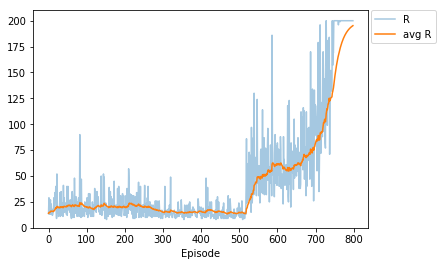

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt

rewards = plt.plot(R, alpha=.4, label='R')
avg_rewards = plt.plot(R_avg,label='avg R')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.xlabel('Episode')
plt.ylim(0, 210)
plt.show()

Congratulations, you have now successfully implemented the DDQN algorithm. You are encouraged to explore different problems. There are a lot of different environments ready for you to implement your algorithms in. A few of these resources are:
* [OpenAI gym](https://github.com/openai/gym)
* [OpenAI Universe](https://github.com/openai/universe)
* [DeepMind Lab](https://deepmind.com/blog/open-sourcing-deepmind-lab/)

The model you implemented in this lab can be extended to solve harder problems. A good starting-point is to try to solve the Acrobot-problem, by loading the environment as 

**gym.make("Acrobot-v1")**.

The problem might require some modifications to how you decay $\epsilon$, but otherwise, the code you have written within this lab should be sufficient. 

In [ ]:
# Create the environment
env = gym.make("Acrobot-v1")

# Initializations
num_actions = env.action_space.n
obs_dim = env.observation_space.shape[0]
print(env.observation_space)
# Our Neural Netork model used to estimate the Q-values
model = DoubleQLearningModel(state_dim=obs_dim, action_dim=num_actions, learning_rate=1e-4)

# Create replay buffer, where experience in form of tuples <s,a,r,s',t>, gathered from the environment is stored 
# for training
replay_buffer = ExperienceReplay(state_size=obs_dim)

# Train
num_episodes = 15000
batch_size = 256
R, R_avg = train_loop_ddqn(model, env, num_episodes, batch_size, eps_decay=0.001,stopping_criteria=-110.0) 

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Box(2,)
Episode:  0 Reward: -200.0 Epsilon 0.999 mean q 3.561487e-08
Episode:  1 Reward: -200.0 Epsilon 0.998 mean q 3.5972764e-08
Episode:  2 Reward: -200.0 Epsilon 0.997 mean q 3.601018e-08
Episode:  3 Reward: -200.0 Epsilon 0.996 mean q 3.6732597e-08
Episode:  4 Reward: -200.0 Epsilon 0.995 mean q 3.5432986e-08
Episode:  5 Reward: -200.0 Epsilon 0.994 mean q -0.0522401
Episode:  6 Reward: -200.0 Epsilon 0.993 mean q -0.22779271
Episode:  7 Reward: -200.0 Epsilon 0.992 mean q -0.5302948
Episode:  8 Reward: -200.0 Epsilon 0.991 mean q -0.98812014
Episode:  9 Reward: -200.0 Epsilon 0.99 mean q -1.6735307
Episode:  10 Reward: -200.0 Epsilon 0.989 mean q -2.4534392
Episode:  11 Reward: -200.0 Epsilon 0.988 mean q -3.5384896
Episode:  12 Reward: -200.0 Epsilon 0.987 mean q -4.813646
Episode:  13 Reward: -200.0 Epsilon 0.986 mean q -6.4917264
Episode:  14 Reward: -200.0 Epsilon 0.985 mean q -

Episode:  122 Reward: -200.0 Epsilon 0.8769999999999999 mean q -16.166367
Episode:  123 Reward: -200.0 Epsilon 0.8759999999999999 mean q -16.180481
Episode:  124 Reward: -200.0 Epsilon 0.8749999999999999 mean q -16.215384
Episode:  125 Reward: -200.0 Epsilon 0.8739999999999999 mean q -16.187433
Episode:  126 Reward: -200.0 Epsilon 0.8729999999999999 mean q -16.232796
Episode:  127 Reward: -200.0 Epsilon 0.8719999999999999 mean q -16.219938
Episode:  128 Reward: -200.0 Epsilon 0.8709999999999999 mean q -16.21859
Episode:  129 Reward: -200.0 Epsilon 0.8699999999999999 mean q -16.198393
Episode:  130 Reward: -200.0 Epsilon 0.8689999999999999 mean q -16.26191
Episode:  131 Reward: -200.0 Epsilon 0.8679999999999999 mean q -16.228624
Episode:  132 Reward: -200.0 Epsilon 0.8669999999999999 mean q -16.242487
Episode:  133 Reward: -200.0 Epsilon 0.8659999999999999 mean q -16.267712
Episode:  134 Reward: -200.0 Epsilon 0.8649999999999999 mean q -16.223265
Episode:  135 Reward: -200.0 Epsilon 0.8

Episode:  233 Reward: -200.0 Epsilon 0.7659999999999998 mean q -16.53808
Episode:  234 Reward: -200.0 Epsilon 0.7649999999999998 mean q -16.552164
Episode:  235 Reward: -200.0 Epsilon 0.7639999999999998 mean q -16.54429
Episode:  236 Reward: -200.0 Epsilon 0.7629999999999998 mean q -16.564766
Episode:  237 Reward: -200.0 Epsilon 0.7619999999999998 mean q -16.55366
Episode:  238 Reward: -200.0 Epsilon 0.7609999999999998 mean q -16.5705
Episode:  239 Reward: -200.0 Epsilon 0.7599999999999998 mean q -16.570408
Episode:  240 Reward: -200.0 Epsilon 0.7589999999999998 mean q -16.596136
Episode:  241 Reward: -200.0 Epsilon 0.7579999999999998 mean q -16.609375
Episode:  242 Reward: -200.0 Epsilon 0.7569999999999998 mean q -16.588509
Episode:  243 Reward: -200.0 Epsilon 0.7559999999999998 mean q -16.603188
Episode:  244 Reward: -200.0 Epsilon 0.7549999999999998 mean q -16.608332
Episode:  245 Reward: -200.0 Epsilon 0.7539999999999998 mean q -16.657915
Episode:  246 Reward: -200.0 Epsilon 0.7529

Episode:  345 Reward: -200.0 Epsilon 0.6539999999999997 mean q -16.657642
Episode:  346 Reward: -200.0 Epsilon 0.6529999999999997 mean q -16.665232
Episode:  347 Reward: -200.0 Epsilon 0.6519999999999997 mean q -16.65525
Episode:  348 Reward: -200.0 Epsilon 0.6509999999999997 mean q -16.640873
Episode:  349 Reward: -200.0 Epsilon 0.6499999999999997 mean q -16.68972
Episode:  350 Reward: -200.0 Epsilon 0.6489999999999997 mean q -16.645576
Episode:  351 Reward: -200.0 Epsilon 0.6479999999999997 mean q -16.684132
Episode:  352 Reward: -200.0 Epsilon 0.6469999999999997 mean q -16.635061
Episode:  353 Reward: -200.0 Epsilon 0.6459999999999997 mean q -16.659254
Episode:  354 Reward: -200.0 Epsilon 0.6449999999999997 mean q -16.646448
Episode:  355 Reward: -200.0 Epsilon 0.6439999999999997 mean q -16.682024
Episode:  356 Reward: -200.0 Epsilon 0.6429999999999997 mean q -16.712938
Episode:  357 Reward: -200.0 Epsilon 0.6419999999999997 mean q -16.7064
Episode:  358 Reward: -200.0 Epsilon 0.640

Episode:  457 Reward: -200.0 Epsilon 0.5419999999999996 mean q -16.651482
Episode:  458 Reward: -200.0 Epsilon 0.5409999999999996 mean q -16.655691
Episode:  459 Reward: -200.0 Epsilon 0.5399999999999996 mean q -16.689526
Episode:  460 Reward: -200.0 Epsilon 0.5389999999999996 mean q -16.676441
Episode:  461 Reward: -200.0 Epsilon 0.5379999999999996 mean q -16.642406
Episode:  462 Reward: -200.0 Epsilon 0.5369999999999996 mean q -16.648298
Episode:  463 Reward: -200.0 Epsilon 0.5359999999999996 mean q -16.66151
Episode:  464 Reward: -200.0 Epsilon 0.5349999999999996 mean q -16.642906
Episode:  465 Reward: -200.0 Epsilon 0.5339999999999996 mean q -16.683304
Episode:  466 Reward: -200.0 Epsilon 0.5329999999999996 mean q -16.665932
Episode:  467 Reward: -200.0 Epsilon 0.5319999999999996 mean q -16.652424
Episode:  468 Reward: -200.0 Epsilon 0.5309999999999996 mean q -16.65233
Episode:  469 Reward: -200.0 Epsilon 0.5299999999999996 mean q -16.647865
Episode:  470 Reward: -200.0 Epsilon 0.5

Episode:  568 Reward: -200.0 Epsilon 0.4309999999999995 mean q -16.672401
Episode:  569 Reward: -200.0 Epsilon 0.4299999999999995 mean q -16.646664
Episode:  570 Reward: -200.0 Epsilon 0.4289999999999995 mean q -16.674133
Episode:  571 Reward: -200.0 Epsilon 0.4279999999999995 mean q -16.688726
Episode:  572 Reward: -200.0 Epsilon 0.4269999999999995 mean q -16.664976
Episode:  573 Reward: -200.0 Epsilon 0.4259999999999995 mean q -16.682566
Episode:  574 Reward: -200.0 Epsilon 0.4249999999999995 mean q -16.63805
Episode:  575 Reward: -200.0 Epsilon 0.4239999999999995 mean q -16.678408
Episode:  576 Reward: -200.0 Epsilon 0.4229999999999995 mean q -16.651585
Episode:  577 Reward: -200.0 Epsilon 0.4219999999999995 mean q -16.665369
Episode:  578 Reward: -200.0 Epsilon 0.4209999999999995 mean q -16.69641
Episode:  579 Reward: -200.0 Epsilon 0.4199999999999995 mean q -16.66877
Episode:  580 Reward: -200.0 Epsilon 0.4189999999999995 mean q -16.699135
Episode:  581 Reward: -200.0 Epsilon 0.41

Episode:  679 Reward: -200.0 Epsilon 0.3199999999999994 mean q -16.633955
Episode:  680 Reward: -200.0 Epsilon 0.3189999999999994 mean q -16.638689
Episode:  681 Reward: -200.0 Epsilon 0.3179999999999994 mean q -16.656366
Episode:  682 Reward: -200.0 Epsilon 0.3169999999999994 mean q -16.678106
Episode:  683 Reward: -200.0 Epsilon 0.3159999999999994 mean q -16.653868
Episode:  684 Reward: -200.0 Epsilon 0.3149999999999994 mean q -16.710424
Episode:  685 Reward: -200.0 Epsilon 0.3139999999999994 mean q -16.671515
Episode:  686 Reward: -200.0 Epsilon 0.3129999999999994 mean q -16.663025
Episode:  687 Reward: -200.0 Epsilon 0.3119999999999994 mean q -16.674532
Episode:  688 Reward: -200.0 Epsilon 0.3109999999999994 mean q -16.66431
Episode:  689 Reward: -200.0 Epsilon 0.3099999999999994 mean q -16.656342
Episode:  690 Reward: -200.0 Epsilon 0.3089999999999994 mean q -16.651016
Episode:  691 Reward: -200.0 Epsilon 0.3079999999999994 mean q -16.650963
Episode:  692 Reward: -200.0 Epsilon 0.

Episode:  790 Reward: -200.0 Epsilon 0.2089999999999993 mean q -16.658506
Episode:  791 Reward: -200.0 Epsilon 0.2079999999999993 mean q -16.66853
Episode:  792 Reward: -200.0 Epsilon 0.2069999999999993 mean q -16.670494
Episode:  793 Reward: -200.0 Epsilon 0.2059999999999993 mean q -16.68879
Episode:  794 Reward: -200.0 Epsilon 0.2049999999999993 mean q -16.665068
Episode:  795 Reward: -200.0 Epsilon 0.2039999999999993 mean q -16.683414
Episode:  796 Reward: -200.0 Epsilon 0.2029999999999993 mean q -16.666634
Episode:  797 Reward: -200.0 Epsilon 0.2019999999999993 mean q -16.71453
Episode:  798 Reward: -200.0 Epsilon 0.2009999999999993 mean q -16.65254
Episode:  799 Reward: -200.0 Epsilon 0.1999999999999993 mean q -16.663155
Episode:  800 Reward: -200.0 Epsilon 0.1989999999999993 mean q -16.682528
Episode:  801 Reward: -200.0 Epsilon 0.1979999999999993 mean q -16.693089
Episode:  802 Reward: -200.0 Epsilon 0.1969999999999993 mean q -16.642973
Episode:  803 Reward: -200.0 Epsilon 0.195

Episode:  901 Reward: -200.0 Epsilon 0.1 mean q -16.672262
Episode:  902 Reward: -200.0 Epsilon 0.1 mean q -16.642836
Episode:  903 Reward: -200.0 Epsilon 0.1 mean q -16.68369
Episode:  904 Reward: -200.0 Epsilon 0.1 mean q -16.668106
Episode:  905 Reward: -200.0 Epsilon 0.1 mean q -16.667757
Episode:  906 Reward: -200.0 Epsilon 0.1 mean q -16.695156
Episode:  907 Reward: -200.0 Epsilon 0.1 mean q -16.676523
Episode:  908 Reward: -200.0 Epsilon 0.1 mean q -16.669493
Episode:  909 Reward: -200.0 Epsilon 0.1 mean q -16.684008
Episode:  910 Reward: -200.0 Epsilon 0.1 mean q -16.68527
Episode:  911 Reward: -200.0 Epsilon 0.1 mean q -16.68759
Episode:  912 Reward: -200.0 Epsilon 0.1 mean q -16.679504
Episode:  913 Reward: -200.0 Epsilon 0.1 mean q -16.65486
Episode:  914 Reward: -200.0 Epsilon 0.1 mean q -16.647799
Episode:  915 Reward: -200.0 Epsilon 0.1 mean q -16.618925
Episode:  916 Reward: -200.0 Epsilon 0.1 mean q -16.640139
Episode:  917 Reward: -200.0 Epsilon 0.1 mean q -16.679491
E

Episode:  1040 Reward: -200.0 Epsilon 0.1 mean q -16.668194
Episode:  1041 Reward: -200.0 Epsilon 0.1 mean q -16.651852
Episode:  1042 Reward: -200.0 Epsilon 0.1 mean q -16.68734
Episode:  1043 Reward: -200.0 Epsilon 0.1 mean q -16.630043
Episode:  1044 Reward: -200.0 Epsilon 0.1 mean q -16.669245
Episode:  1045 Reward: -200.0 Epsilon 0.1 mean q -16.698463
Episode:  1046 Reward: -200.0 Epsilon 0.1 mean q -16.69025
Episode:  1047 Reward: -200.0 Epsilon 0.1 mean q -16.634737
Episode:  1048 Reward: -200.0 Epsilon 0.1 mean q -16.66237
Episode:  1049 Reward: -200.0 Epsilon 0.1 mean q -16.671717
Episode:  1050 Reward: -200.0 Epsilon 0.1 mean q -16.66006
Episode:  1051 Reward: -200.0 Epsilon 0.1 mean q -16.681787
Episode:  1052 Reward: -200.0 Epsilon 0.1 mean q -16.656307
Episode:  1053 Reward: -200.0 Epsilon 0.1 mean q -16.642246
Episode:  1054 Reward: -200.0 Epsilon 0.1 mean q -16.694214
Episode:  1055 Reward: -200.0 Epsilon 0.1 mean q -16.6401
Episode:  1056 Reward: -200.0 Epsilon 0.1 mean

Episode:  1178 Reward: -200.0 Epsilon 0.1 mean q -16.638556
Episode:  1179 Reward: -200.0 Epsilon 0.1 mean q -16.68484
Episode:  1180 Reward: -200.0 Epsilon 0.1 mean q -16.660046
Episode:  1181 Reward: -200.0 Epsilon 0.1 mean q -16.668642
Episode:  1182 Reward: -200.0 Epsilon 0.1 mean q -16.667164
Episode:  1183 Reward: -200.0 Epsilon 0.1 mean q -16.662054
Episode:  1184 Reward: -200.0 Epsilon 0.1 mean q -16.673395
Episode:  1185 Reward: -200.0 Epsilon 0.1 mean q -16.614954
Episode:  1186 Reward: -200.0 Epsilon 0.1 mean q -16.666508
Episode:  1187 Reward: -200.0 Epsilon 0.1 mean q -16.637335
Episode:  1188 Reward: -200.0 Epsilon 0.1 mean q -16.672638
Episode:  1189 Reward: -200.0 Epsilon 0.1 mean q -16.684004
Episode:  1190 Reward: -200.0 Epsilon 0.1 mean q -16.682379
Episode:  1191 Reward: -200.0 Epsilon 0.1 mean q -16.663235
Episode:  1192 Reward: -200.0 Epsilon 0.1 mean q -16.655611
Episode:  1193 Reward: -200.0 Epsilon 0.1 mean q -16.6608
Episode:  1194 Reward: -200.0 Epsilon 0.1 m

Episode:  1315 Reward: -200.0 Epsilon 0.1 mean q -16.637703
Episode:  1316 Reward: -200.0 Epsilon 0.1 mean q -16.619339
Episode:  1317 Reward: -200.0 Epsilon 0.1 mean q -16.674377
Episode:  1318 Reward: -200.0 Epsilon 0.1 mean q -16.660662
Episode:  1319 Reward: -200.0 Epsilon 0.1 mean q -16.656809
Episode:  1320 Reward: -200.0 Epsilon 0.1 mean q -16.694498
Episode:  1321 Reward: -200.0 Epsilon 0.1 mean q -16.673046
Episode:  1322 Reward: -200.0 Epsilon 0.1 mean q -16.660936
Episode:  1323 Reward: -200.0 Epsilon 0.1 mean q -16.656868
Episode:  1324 Reward: -200.0 Epsilon 0.1 mean q -16.641787
Episode:  1325 Reward: -200.0 Epsilon 0.1 mean q -16.646856
Episode:  1326 Reward: -200.0 Epsilon 0.1 mean q -16.668053
Episode:  1327 Reward: -200.0 Epsilon 0.1 mean q -16.632563
Episode:  1328 Reward: -200.0 Epsilon 0.1 mean q -16.620354
Episode:  1329 Reward: -200.0 Epsilon 0.1 mean q -16.681337
Episode:  1330 Reward: -200.0 Epsilon 0.1 mean q -16.659662
Episode:  1331 Reward: -200.0 Epsilon 0.

Episode:  1452 Reward: -200.0 Epsilon 0.1 mean q -16.669489
Episode:  1453 Reward: -200.0 Epsilon 0.1 mean q -16.670797
Episode:  1454 Reward: -200.0 Epsilon 0.1 mean q -16.683985
Episode:  1455 Reward: -200.0 Epsilon 0.1 mean q -16.676329
Episode:  1456 Reward: -200.0 Epsilon 0.1 mean q -16.69126
Episode:  1457 Reward: -200.0 Epsilon 0.1 mean q -16.697893
Episode:  1458 Reward: -200.0 Epsilon 0.1 mean q -16.630095
Episode:  1459 Reward: -200.0 Epsilon 0.1 mean q -16.657444
Episode:  1460 Reward: -200.0 Epsilon 0.1 mean q -16.662989
Episode:  1461 Reward: -200.0 Epsilon 0.1 mean q -16.653807
Episode:  1462 Reward: -200.0 Epsilon 0.1 mean q -16.670277
Episode:  1463 Reward: -200.0 Epsilon 0.1 mean q -16.642805
Episode:  1464 Reward: -200.0 Epsilon 0.1 mean q -16.685108
Episode:  1465 Reward: -200.0 Epsilon 0.1 mean q -16.644707
Episode:  1466 Reward: -200.0 Epsilon 0.1 mean q -16.673979
Episode:  1467 Reward: -200.0 Epsilon 0.1 mean q -16.686174
Episode:  1468 Reward: -200.0 Epsilon 0.1

Episode:  1589 Reward: -200.0 Epsilon 0.1 mean q -16.676247
Episode:  1590 Reward: -200.0 Epsilon 0.1 mean q -16.647364
Episode:  1591 Reward: -200.0 Epsilon 0.1 mean q -16.664124
Episode:  1592 Reward: -200.0 Epsilon 0.1 mean q -16.657696
Episode:  1593 Reward: -200.0 Epsilon 0.1 mean q -16.677254
Episode:  1594 Reward: -200.0 Epsilon 0.1 mean q -16.655518
Episode:  1595 Reward: -200.0 Epsilon 0.1 mean q -16.639809
Episode:  1596 Reward: -200.0 Epsilon 0.1 mean q -16.62371
Episode:  1597 Reward: -200.0 Epsilon 0.1 mean q -16.639273
Episode:  1598 Reward: -200.0 Epsilon 0.1 mean q -16.687906
Episode:  1599 Reward: -200.0 Epsilon 0.1 mean q -16.677448
Episode:  1600 Reward: -200.0 Epsilon 0.1 mean q -16.663616
Episode:  1601 Reward: -200.0 Epsilon 0.1 mean q -16.647432
Episode:  1602 Reward: -200.0 Epsilon 0.1 mean q -16.66765
Episode:  1603 Reward: -200.0 Epsilon 0.1 mean q -16.652647
Episode:  1604 Reward: -200.0 Epsilon 0.1 mean q -16.65847
Episode:  1605 Reward: -200.0 Epsilon 0.1 m

Episode:  1727 Reward: -200.0 Epsilon 0.1 mean q -16.676445
Episode:  1728 Reward: -200.0 Epsilon 0.1 mean q -16.678932
Episode:  1729 Reward: -200.0 Epsilon 0.1 mean q -16.709078
Episode:  1730 Reward: -200.0 Epsilon 0.1 mean q -16.676085
Episode:  1731 Reward: -200.0 Epsilon 0.1 mean q -16.636494
Episode:  1732 Reward: -200.0 Epsilon 0.1 mean q -16.684727
Episode:  1733 Reward: -200.0 Epsilon 0.1 mean q -16.638725
Episode:  1734 Reward: -200.0 Epsilon 0.1 mean q -16.624529
Episode:  1735 Reward: -200.0 Epsilon 0.1 mean q -16.630888
Episode:  1736 Reward: -200.0 Epsilon 0.1 mean q -16.650774
Episode:  1737 Reward: -200.0 Epsilon 0.1 mean q -16.669329
Episode:  1738 Reward: -200.0 Epsilon 0.1 mean q -16.669504
Episode:  1739 Reward: -200.0 Epsilon 0.1 mean q -16.669664
Episode:  1740 Reward: -200.0 Epsilon 0.1 mean q -16.642813
Episode:  1741 Reward: -200.0 Epsilon 0.1 mean q -16.701689
Episode:  1742 Reward: -200.0 Epsilon 0.1 mean q -16.67572
Episode:  1743 Reward: -200.0 Epsilon 0.1

Episode:  1865 Reward: -200.0 Epsilon 0.1 mean q -16.633018
Episode:  1866 Reward: -200.0 Epsilon 0.1 mean q -16.694994
Episode:  1867 Reward: -200.0 Epsilon 0.1 mean q -16.624441
Episode:  1868 Reward: -200.0 Epsilon 0.1 mean q -16.676025
Episode:  1869 Reward: -200.0 Epsilon 0.1 mean q -16.673359
Episode:  1870 Reward: -200.0 Epsilon 0.1 mean q -16.674692
Episode:  1871 Reward: -200.0 Epsilon 0.1 mean q -16.683487
Episode:  1872 Reward: -200.0 Epsilon 0.1 mean q -16.704088
Episode:  1873 Reward: -200.0 Epsilon 0.1 mean q -16.682947
Episode:  1874 Reward: -200.0 Epsilon 0.1 mean q -16.658133
Episode:  1875 Reward: -200.0 Epsilon 0.1 mean q -16.671793
Episode:  1876 Reward: -200.0 Epsilon 0.1 mean q -16.652657
Episode:  1877 Reward: -200.0 Epsilon 0.1 mean q -16.697237
Episode:  1878 Reward: -200.0 Epsilon 0.1 mean q -16.68766
Episode:  1879 Reward: -200.0 Epsilon 0.1 mean q -16.687645
Episode:  1880 Reward: -200.0 Epsilon 0.1 mean q -16.6924
Episode:  1881 Reward: -200.0 Epsilon 0.1 m

Episode:  2003 Reward: -200.0 Epsilon 0.1 mean q -16.664068
Episode:  2004 Reward: -200.0 Epsilon 0.1 mean q -16.654747
Episode:  2005 Reward: -200.0 Epsilon 0.1 mean q -16.643957
Episode:  2006 Reward: -200.0 Epsilon 0.1 mean q -16.670033
Episode:  2007 Reward: -200.0 Epsilon 0.1 mean q -16.668484
Episode:  2008 Reward: -200.0 Epsilon 0.1 mean q -16.65754
Episode:  2009 Reward: -200.0 Epsilon 0.1 mean q -16.672327
Episode:  2010 Reward: -200.0 Epsilon 0.1 mean q -16.659771
Episode:  2011 Reward: -200.0 Epsilon 0.1 mean q -16.653872
Episode:  2012 Reward: -200.0 Epsilon 0.1 mean q -16.712437
Episode:  2013 Reward: -200.0 Epsilon 0.1 mean q -16.654236
Episode:  2014 Reward: -200.0 Epsilon 0.1 mean q -16.631586
Episode:  2015 Reward: -200.0 Epsilon 0.1 mean q -16.650663
Episode:  2016 Reward: -200.0 Epsilon 0.1 mean q -16.664375
Episode:  2017 Reward: -200.0 Epsilon 0.1 mean q -16.674164
Episode:  2018 Reward: -200.0 Epsilon 0.1 mean q -16.627483
Episode:  2019 Reward: -200.0 Epsilon 0.1

Episode:  2140 Reward: -200.0 Epsilon 0.1 mean q -16.668262
Episode:  2141 Reward: -200.0 Epsilon 0.1 mean q -16.683329
Episode:  2142 Reward: -200.0 Epsilon 0.1 mean q -16.67945
Episode:  2143 Reward: -200.0 Epsilon 0.1 mean q -16.690811
Episode:  2144 Reward: -200.0 Epsilon 0.1 mean q -16.697311
Episode:  2145 Reward: -200.0 Epsilon 0.1 mean q -16.643393
Episode:  2146 Reward: -200.0 Epsilon 0.1 mean q -16.666601
Episode:  2147 Reward: -200.0 Epsilon 0.1 mean q -16.672407
Episode:  2148 Reward: -200.0 Epsilon 0.1 mean q -16.671692
Episode:  2149 Reward: -200.0 Epsilon 0.1 mean q -16.697796
Episode:  2150 Reward: -200.0 Epsilon 0.1 mean q -16.660967
Episode:  2151 Reward: -200.0 Epsilon 0.1 mean q -16.695442
Episode:  2152 Reward: -200.0 Epsilon 0.1 mean q -16.655973
Episode:  2153 Reward: -200.0 Epsilon 0.1 mean q -16.650496
Episode:  2154 Reward: -200.0 Epsilon 0.1 mean q -16.652037
Episode:  2155 Reward: -200.0 Epsilon 0.1 mean q -16.670048
Episode:  2156 Reward: -200.0 Epsilon 0.1

Episode:  2277 Reward: -200.0 Epsilon 0.1 mean q -16.687685
Episode:  2278 Reward: -200.0 Epsilon 0.1 mean q -16.64905
Episode:  2279 Reward: -200.0 Epsilon 0.1 mean q -16.657192
Episode:  2280 Reward: -200.0 Epsilon 0.1 mean q -16.64714
Episode:  2281 Reward: -200.0 Epsilon 0.1 mean q -16.718367
Episode:  2282 Reward: -200.0 Epsilon 0.1 mean q -16.651112
Episode:  2283 Reward: -200.0 Epsilon 0.1 mean q -16.674688
Episode:  2284 Reward: -200.0 Epsilon 0.1 mean q -16.669443
Episode:  2285 Reward: -200.0 Epsilon 0.1 mean q -16.677135
Episode:  2286 Reward: -200.0 Epsilon 0.1 mean q -16.650953
Episode:  2287 Reward: -200.0 Epsilon 0.1 mean q -16.665745
Episode:  2288 Reward: -200.0 Epsilon 0.1 mean q -16.64588
Episode:  2289 Reward: -200.0 Epsilon 0.1 mean q -16.683664
Episode:  2290 Reward: -200.0 Epsilon 0.1 mean q -16.645462
Episode:  2291 Reward: -200.0 Epsilon 0.1 mean q -16.669716
Episode:  2292 Reward: -200.0 Epsilon 0.1 mean q -16.692719
Episode:  2293 Reward: -200.0 Epsilon 0.1 m

Episode:  2414 Reward: -200.0 Epsilon 0.1 mean q -16.667915
Episode:  2415 Reward: -200.0 Epsilon 0.1 mean q -16.703045
Episode:  2416 Reward: -200.0 Epsilon 0.1 mean q -16.710398
Episode:  2417 Reward: -200.0 Epsilon 0.1 mean q -16.655739
Episode:  2418 Reward: -200.0 Epsilon 0.1 mean q -16.663795
Episode:  2419 Reward: -200.0 Epsilon 0.1 mean q -16.671604
Episode:  2420 Reward: -200.0 Epsilon 0.1 mean q -16.672684
Episode:  2421 Reward: -200.0 Epsilon 0.1 mean q -16.69173
Episode:  2422 Reward: -200.0 Epsilon 0.1 mean q -16.607227
Episode:  2423 Reward: -200.0 Epsilon 0.1 mean q -16.663155
Episode:  2424 Reward: -200.0 Epsilon 0.1 mean q -16.707737
Episode:  2425 Reward: -200.0 Epsilon 0.1 mean q -16.652536
Episode:  2426 Reward: -200.0 Epsilon 0.1 mean q -16.65713
Episode:  2427 Reward: -200.0 Epsilon 0.1 mean q -16.64291
Episode:  2428 Reward: -200.0 Epsilon 0.1 mean q -16.625471
Episode:  2429 Reward: -200.0 Epsilon 0.1 mean q -16.662601
Episode:  2430 Reward: -200.0 Epsilon 0.1 m

Episode:  2551 Reward: -200.0 Epsilon 0.1 mean q -16.666145
Episode:  2552 Reward: -200.0 Epsilon 0.1 mean q -16.68628
Episode:  2553 Reward: -200.0 Epsilon 0.1 mean q -16.62091
Episode:  2554 Reward: -200.0 Epsilon 0.1 mean q -16.650938
Episode:  2555 Reward: -200.0 Epsilon 0.1 mean q -16.664711
Episode:  2556 Reward: -200.0 Epsilon 0.1 mean q -16.661993
Episode:  2557 Reward: -200.0 Epsilon 0.1 mean q -16.680637
Episode:  2558 Reward: -200.0 Epsilon 0.1 mean q -16.655693
Episode:  2559 Reward: -200.0 Epsilon 0.1 mean q -16.661383
Episode:  2560 Reward: -200.0 Epsilon 0.1 mean q -16.7012
Episode:  2561 Reward: -200.0 Epsilon 0.1 mean q -16.658962
Episode:  2562 Reward: -200.0 Epsilon 0.1 mean q -16.676888
Episode:  2563 Reward: -200.0 Epsilon 0.1 mean q -16.634882
Episode:  2564 Reward: -200.0 Epsilon 0.1 mean q -16.665209
Episode:  2565 Reward: -200.0 Epsilon 0.1 mean q -16.64604
Episode:  2566 Reward: -200.0 Epsilon 0.1 mean q -16.652819
Episode:  2567 Reward: -200.0 Epsilon 0.1 mea

Episode:  2688 Reward: -200.0 Epsilon 0.1 mean q -16.664906
Episode:  2689 Reward: -200.0 Epsilon 0.1 mean q -16.666168
Episode:  2690 Reward: -200.0 Epsilon 0.1 mean q -16.686378
Episode:  2691 Reward: -200.0 Epsilon 0.1 mean q -16.683407
Episode:  2692 Reward: -200.0 Epsilon 0.1 mean q -16.690966
Episode:  2693 Reward: -200.0 Epsilon 0.1 mean q -16.659586
Episode:  2694 Reward: -200.0 Epsilon 0.1 mean q -16.670292
Episode:  2695 Reward: -200.0 Epsilon 0.1 mean q -16.672092
Episode:  2696 Reward: -200.0 Epsilon 0.1 mean q -16.671696
Episode:  2697 Reward: -200.0 Epsilon 0.1 mean q -16.66921
Episode:  2698 Reward: -200.0 Epsilon 0.1 mean q -16.684874
Episode:  2699 Reward: -200.0 Epsilon 0.1 mean q -16.650497
Episode:  2700 Reward: -200.0 Epsilon 0.1 mean q -16.678213
Episode:  2701 Reward: -200.0 Epsilon 0.1 mean q -16.681038
Episode:  2702 Reward: -200.0 Epsilon 0.1 mean q -16.66045
Episode:  2703 Reward: -200.0 Epsilon 0.1 mean q -16.682768
Episode:  2704 Reward: -200.0 Epsilon 0.1 

Episode:  2826 Reward: -200.0 Epsilon 0.1 mean q -16.673018
Episode:  2827 Reward: -200.0 Epsilon 0.1 mean q -16.663673
Episode:  2828 Reward: -200.0 Epsilon 0.1 mean q -16.659086
Episode:  2829 Reward: -200.0 Epsilon 0.1 mean q -16.66135
Episode:  2830 Reward: -200.0 Epsilon 0.1 mean q -16.684
Episode:  2831 Reward: -200.0 Epsilon 0.1 mean q -16.658873
Episode:  2832 Reward: -200.0 Epsilon 0.1 mean q -16.64874
Episode:  2833 Reward: -200.0 Epsilon 0.1 mean q -16.6656
Episode:  2834 Reward: -200.0 Epsilon 0.1 mean q -16.66526
Episode:  2835 Reward: -200.0 Epsilon 0.1 mean q -16.652464
Episode:  2836 Reward: -200.0 Epsilon 0.1 mean q -16.669928
Episode:  2837 Reward: -200.0 Epsilon 0.1 mean q -16.667683
Episode:  2838 Reward: -200.0 Epsilon 0.1 mean q -16.653662
Episode:  2839 Reward: -200.0 Epsilon 0.1 mean q -16.674524
Episode:  2840 Reward: -200.0 Epsilon 0.1 mean q -16.673769
Episode:  2841 Reward: -200.0 Epsilon 0.1 mean q -16.701382
Episode:  2842 Reward: -200.0 Epsilon 0.1 mean q

Episode:  2964 Reward: -200.0 Epsilon 0.1 mean q -16.623901
Episode:  2965 Reward: -200.0 Epsilon 0.1 mean q -16.647322
Episode:  2966 Reward: -200.0 Epsilon 0.1 mean q -16.644636
Episode:  2967 Reward: -200.0 Epsilon 0.1 mean q -16.655266
Episode:  2968 Reward: -200.0 Epsilon 0.1 mean q -16.65878
Episode:  2969 Reward: -200.0 Epsilon 0.1 mean q -16.657845
Episode:  2970 Reward: -200.0 Epsilon 0.1 mean q -16.616686
Episode:  2971 Reward: -200.0 Epsilon 0.1 mean q -16.671852
Episode:  2972 Reward: -200.0 Epsilon 0.1 mean q -16.616457
Episode:  2973 Reward: -200.0 Epsilon 0.1 mean q -16.647572
Episode:  2974 Reward: -200.0 Epsilon 0.1 mean q -16.691477
Episode:  2975 Reward: -200.0 Epsilon 0.1 mean q -16.701214
Episode:  2976 Reward: -200.0 Epsilon 0.1 mean q -16.676796
Episode:  2977 Reward: -200.0 Epsilon 0.1 mean q -16.682669
Episode:  2978 Reward: -200.0 Epsilon 0.1 mean q -16.67259
Episode:  2979 Reward: -200.0 Epsilon 0.1 mean q -16.646276
Episode:  2980 Reward: -200.0 Epsilon 0.1 

Episode:  3101 Reward: -200.0 Epsilon 0.1 mean q -16.667751
Episode:  3102 Reward: -200.0 Epsilon 0.1 mean q -16.670027
Episode:  3103 Reward: -200.0 Epsilon 0.1 mean q -16.672073
Episode:  3104 Reward: -200.0 Epsilon 0.1 mean q -16.65731
Episode:  3105 Reward: -200.0 Epsilon 0.1 mean q -16.679893
Episode:  3106 Reward: -200.0 Epsilon 0.1 mean q -16.640297
Episode:  3107 Reward: -200.0 Epsilon 0.1 mean q -16.634165
Episode:  3108 Reward: -200.0 Epsilon 0.1 mean q -16.649519
Episode:  3109 Reward: -200.0 Epsilon 0.1 mean q -16.66235
Episode:  3110 Reward: -200.0 Epsilon 0.1 mean q -16.67719
Episode:  3111 Reward: -200.0 Epsilon 0.1 mean q -16.66374
Episode:  3112 Reward: -200.0 Epsilon 0.1 mean q -16.672731
Episode:  3113 Reward: -200.0 Epsilon 0.1 mean q -16.660517
Episode:  3114 Reward: -200.0 Epsilon 0.1 mean q -16.637552
Episode:  3115 Reward: -200.0 Epsilon 0.1 mean q -16.675425
Episode:  3116 Reward: -200.0 Epsilon 0.1 mean q -16.703428
Episode:  3117 Reward: -200.0 Epsilon 0.1 me

Episode:  3239 Reward: -200.0 Epsilon 0.1 mean q -16.6636
Episode:  3240 Reward: -200.0 Epsilon 0.1 mean q -16.656038
Episode:  3241 Reward: -200.0 Epsilon 0.1 mean q -16.631441
Episode:  3242 Reward: -200.0 Epsilon 0.1 mean q -16.67098
Episode:  3243 Reward: -200.0 Epsilon 0.1 mean q -16.671852
Episode:  3244 Reward: -200.0 Epsilon 0.1 mean q -16.676107
Episode:  3245 Reward: -200.0 Epsilon 0.1 mean q -16.641676
Episode:  3246 Reward: -200.0 Epsilon 0.1 mean q -16.680841
Episode:  3247 Reward: -200.0 Epsilon 0.1 mean q -16.679173
Episode:  3248 Reward: -200.0 Epsilon 0.1 mean q -16.678638
Episode:  3249 Reward: -200.0 Epsilon 0.1 mean q -16.651802
Episode:  3250 Reward: -200.0 Epsilon 0.1 mean q -16.688953
Episode:  3251 Reward: -200.0 Epsilon 0.1 mean q -16.651152
Episode:  3252 Reward: -200.0 Epsilon 0.1 mean q -16.68509
Episode:  3253 Reward: -200.0 Epsilon 0.1 mean q -16.670078
Episode:  3254 Reward: -200.0 Epsilon 0.1 mean q -16.724113
Episode:  3255 Reward: -200.0 Epsilon 0.1 me

Episode:  3376 Reward: -200.0 Epsilon 0.1 mean q -16.6474
Episode:  3377 Reward: -200.0 Epsilon 0.1 mean q -16.67106
Episode:  3378 Reward: -200.0 Epsilon 0.1 mean q -16.660234
Episode:  3379 Reward: -200.0 Epsilon 0.1 mean q -16.648443
Episode:  3380 Reward: -200.0 Epsilon 0.1 mean q -16.679482
Episode:  3381 Reward: -200.0 Epsilon 0.1 mean q -16.643732
Episode:  3382 Reward: -200.0 Epsilon 0.1 mean q -16.697987
Episode:  3383 Reward: -200.0 Epsilon 0.1 mean q -16.681204
Episode:  3384 Reward: -200.0 Epsilon 0.1 mean q -16.650614
Episode:  3385 Reward: -200.0 Epsilon 0.1 mean q -16.67774
Episode:  3386 Reward: -200.0 Epsilon 0.1 mean q -16.668682
Episode:  3387 Reward: -200.0 Epsilon 0.1 mean q -16.655449
Episode:  3388 Reward: -200.0 Epsilon 0.1 mean q -16.686666
Episode:  3389 Reward: -200.0 Epsilon 0.1 mean q -16.651072
Episode:  3390 Reward: -200.0 Epsilon 0.1 mean q -16.649944
Episode:  3391 Reward: -200.0 Epsilon 0.1 mean q -16.675087
Episode:  3392 Reward: -200.0 Epsilon 0.1 me

Episode:  3513 Reward: -200.0 Epsilon 0.1 mean q -16.654514
Episode:  3514 Reward: -200.0 Epsilon 0.1 mean q -16.63766
Episode:  3515 Reward: -200.0 Epsilon 0.1 mean q -16.671257
Episode:  3516 Reward: -200.0 Epsilon 0.1 mean q -16.66612
Episode:  3517 Reward: -200.0 Epsilon 0.1 mean q -16.664457
Episode:  3518 Reward: -200.0 Epsilon 0.1 mean q -16.635674
Episode:  3519 Reward: -200.0 Epsilon 0.1 mean q -16.658737
Episode:  3520 Reward: -200.0 Epsilon 0.1 mean q -16.678804
Episode:  3521 Reward: -200.0 Epsilon 0.1 mean q -16.644464
Episode:  3522 Reward: -200.0 Epsilon 0.1 mean q -16.689983
Episode:  3523 Reward: -200.0 Epsilon 0.1 mean q -16.665333
Episode:  3524 Reward: -200.0 Epsilon 0.1 mean q -16.635313
Episode:  3525 Reward: -200.0 Epsilon 0.1 mean q -16.662725
Episode:  3526 Reward: -200.0 Epsilon 0.1 mean q -16.675419
Episode:  3527 Reward: -200.0 Epsilon 0.1 mean q -16.68291
Episode:  3528 Reward: -200.0 Epsilon 0.1 mean q -16.681597
Episode:  3529 Reward: -200.0 Epsilon 0.1 m

Episode:  3650 Reward: -200.0 Epsilon 0.1 mean q -16.661995
Episode:  3651 Reward: -200.0 Epsilon 0.1 mean q -16.65986
Episode:  3652 Reward: -200.0 Epsilon 0.1 mean q -16.673885
Episode:  3653 Reward: -200.0 Epsilon 0.1 mean q -16.672342
Episode:  3654 Reward: -200.0 Epsilon 0.1 mean q -16.710186
Episode:  3655 Reward: -200.0 Epsilon 0.1 mean q -16.691597
Episode:  3656 Reward: -200.0 Epsilon 0.1 mean q -16.663527
Episode:  3657 Reward: -200.0 Epsilon 0.1 mean q -16.644648
Episode:  3658 Reward: -200.0 Epsilon 0.1 mean q -16.67053
Episode:  3659 Reward: -200.0 Epsilon 0.1 mean q -16.655403
Episode:  3660 Reward: -200.0 Epsilon 0.1 mean q -16.643038
Episode:  3661 Reward: -200.0 Epsilon 0.1 mean q -16.70589
Episode:  3662 Reward: -200.0 Epsilon 0.1 mean q -16.65702
Episode:  3663 Reward: -200.0 Epsilon 0.1 mean q -16.644022
Episode:  3664 Reward: -200.0 Epsilon 0.1 mean q -16.652313
Episode:  3665 Reward: -200.0 Epsilon 0.1 mean q -16.693693
Episode:  3666 Reward: -200.0 Epsilon 0.1 me

Episode:  3788 Reward: -200.0 Epsilon 0.1 mean q -16.673496
Episode:  3789 Reward: -200.0 Epsilon 0.1 mean q -16.66151
Episode:  3790 Reward: -200.0 Epsilon 0.1 mean q -16.66056
Episode:  3791 Reward: -200.0 Epsilon 0.1 mean q -16.654928
Episode:  3792 Reward: -200.0 Epsilon 0.1 mean q -16.656157
Episode:  3793 Reward: -200.0 Epsilon 0.1 mean q -16.65295
Episode:  3794 Reward: -200.0 Epsilon 0.1 mean q -16.687256
Episode:  3795 Reward: -200.0 Epsilon 0.1 mean q -16.643282
Episode:  3796 Reward: -200.0 Epsilon 0.1 mean q -16.654993
Episode:  3797 Reward: -200.0 Epsilon 0.1 mean q -16.65385
Episode:  3798 Reward: -200.0 Epsilon 0.1 mean q -16.664003
Episode:  3799 Reward: -200.0 Epsilon 0.1 mean q -16.664555
Episode:  3800 Reward: -200.0 Epsilon 0.1 mean q -16.653805
Episode:  3801 Reward: -200.0 Epsilon 0.1 mean q -16.690046
Episode:  3802 Reward: -200.0 Epsilon 0.1 mean q -16.648853
Episode:  3803 Reward: -200.0 Epsilon 0.1 mean q -16.660494
Episode:  3804 Reward: -200.0 Epsilon 0.1 me

Episode:  3925 Reward: -200.0 Epsilon 0.1 mean q -16.656858
Episode:  3926 Reward: -200.0 Epsilon 0.1 mean q -16.689817
Episode:  3927 Reward: -200.0 Epsilon 0.1 mean q -16.660566
Episode:  3928 Reward: -200.0 Epsilon 0.1 mean q -16.690748
Episode:  3929 Reward: -200.0 Epsilon 0.1 mean q -16.636545
Episode:  3930 Reward: -200.0 Epsilon 0.1 mean q -16.670748
Episode:  3931 Reward: -200.0 Epsilon 0.1 mean q -16.658264
Episode:  3932 Reward: -200.0 Epsilon 0.1 mean q -16.66023
Episode:  3933 Reward: -200.0 Epsilon 0.1 mean q -16.652046
Episode:  3934 Reward: -200.0 Epsilon 0.1 mean q -16.655931
Episode:  3935 Reward: -200.0 Epsilon 0.1 mean q -16.670757
Episode:  3936 Reward: -200.0 Epsilon 0.1 mean q -16.633669
Episode:  3937 Reward: -200.0 Epsilon 0.1 mean q -16.67516
Episode:  3938 Reward: -200.0 Epsilon 0.1 mean q -16.632187
Episode:  3939 Reward: -200.0 Epsilon 0.1 mean q -16.659395
Episode:  3940 Reward: -200.0 Epsilon 0.1 mean q -16.674633
Episode:  3941 Reward: -200.0 Epsilon 0.1 

Episode:  4063 Reward: -200.0 Epsilon 0.1 mean q -16.680693
Episode:  4064 Reward: -200.0 Epsilon 0.1 mean q -16.654512
Episode:  4065 Reward: -200.0 Epsilon 0.1 mean q -16.681715
Episode:  4066 Reward: -200.0 Epsilon 0.1 mean q -16.690693
Episode:  4067 Reward: -200.0 Epsilon 0.1 mean q -16.652317
Episode:  4068 Reward: -200.0 Epsilon 0.1 mean q -16.67851
Episode:  4069 Reward: -200.0 Epsilon 0.1 mean q -16.65462
Episode:  4070 Reward: -200.0 Epsilon 0.1 mean q -16.696331
Episode:  4071 Reward: -200.0 Epsilon 0.1 mean q -16.670315
Episode:  4072 Reward: -200.0 Epsilon 0.1 mean q -16.63721
Episode:  4073 Reward: -200.0 Epsilon 0.1 mean q -16.655083
Episode:  4074 Reward: -200.0 Epsilon 0.1 mean q -16.671839
Episode:  4075 Reward: -200.0 Epsilon 0.1 mean q -16.639784
Episode:  4076 Reward: -200.0 Epsilon 0.1 mean q -16.637667
Episode:  4077 Reward: -200.0 Epsilon 0.1 mean q -16.638662
Episode:  4078 Reward: -200.0 Epsilon 0.1 mean q -16.641577
Episode:  4079 Reward: -200.0 Epsilon 0.1 m

Episode:  4200 Reward: -200.0 Epsilon 0.1 mean q -16.687395
Episode:  4201 Reward: -200.0 Epsilon 0.1 mean q -16.669916
Episode:  4202 Reward: -200.0 Epsilon 0.1 mean q -16.633125
Episode:  4203 Reward: -200.0 Epsilon 0.1 mean q -16.663342
Episode:  4204 Reward: -200.0 Epsilon 0.1 mean q -16.687044
Episode:  4205 Reward: -200.0 Epsilon 0.1 mean q -16.65391
Episode:  4206 Reward: -200.0 Epsilon 0.1 mean q -16.672447
Episode:  4207 Reward: -200.0 Epsilon 0.1 mean q -16.670898
Episode:  4208 Reward: -200.0 Epsilon 0.1 mean q -16.652803
Episode:  4209 Reward: -200.0 Epsilon 0.1 mean q -16.64151
Episode:  4210 Reward: -200.0 Epsilon 0.1 mean q -16.681107
Episode:  4211 Reward: -200.0 Epsilon 0.1 mean q -16.6916
Episode:  4212 Reward: -200.0 Epsilon 0.1 mean q -16.710983
Episode:  4213 Reward: -200.0 Epsilon 0.1 mean q -16.661724
Episode:  4214 Reward: -200.0 Epsilon 0.1 mean q -16.66702
Episode:  4215 Reward: -200.0 Epsilon 0.1 mean q -16.667204
Episode:  4216 Reward: -200.0 Epsilon 0.1 mea

Episode:  4338 Reward: -200.0 Epsilon 0.1 mean q -16.638994
Episode:  4339 Reward: -200.0 Epsilon 0.1 mean q -16.653992
Episode:  4340 Reward: -200.0 Epsilon 0.1 mean q -16.645456
Episode:  4341 Reward: -200.0 Epsilon 0.1 mean q -16.660362
Episode:  4342 Reward: -200.0 Epsilon 0.1 mean q -16.66446
Episode:  4343 Reward: -200.0 Epsilon 0.1 mean q -16.644646
Episode:  4344 Reward: -200.0 Epsilon 0.1 mean q -16.638334
Episode:  4345 Reward: -200.0 Epsilon 0.1 mean q -16.631256
Episode:  4346 Reward: -200.0 Epsilon 0.1 mean q -16.668417
Episode:  4347 Reward: -200.0 Epsilon 0.1 mean q -16.709866
Episode:  4348 Reward: -200.0 Epsilon 0.1 mean q -16.664116
Episode:  4349 Reward: -200.0 Epsilon 0.1 mean q -16.690098
Episode:  4350 Reward: -200.0 Epsilon 0.1 mean q -16.680653
Episode:  4351 Reward: -200.0 Epsilon 0.1 mean q -16.66519
Episode:  4352 Reward: -200.0 Epsilon 0.1 mean q -16.673008
Episode:  4353 Reward: -200.0 Epsilon 0.1 mean q -16.661352
Episode:  4354 Reward: -200.0 Epsilon 0.1 

In [120]:
import time
num_episodes = 1
env = gym.make("Acrobot-v1")

for i in range(num_episodes):
        state = eMountainCar-v0nv.reset() #reset to initial state
        state = np.expand_dims(state, axis=0)/2
        terminal = False # reset terminal flag
        while not terminal:
            env.render()
            time.sleep(.04)
            q_values = model.get_q_values(state)
            policy = eps_greedy_policy(q_values.squeeze(), .1) # greedy policy
            action = np.random.choice(num_actions, p=policy)
            state, reward, terminal, _ = env.step(action) # take one step in the evironment
            state = np.expand_dims(state, axis=0)/2
# close window
env.close();

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


### Task 3.2 Atari games

A common benchmark for reinforcement learning algorithms is the old Atari games. For the Atari games, each observation consists of one screenshot of the current state of the game. Other than adding convolutional layers to your neural network, there is one more issue regarding the new input that needs to be solved. Name at least two solutions to the problem, and why it won't work without these changes. 

Hint:
- Imagine the game of pong. What is important for the algorithm to predict? What is the input to the algorithm? Is it possible to predict what we want from the input given?

**Your answer:** (fill in here)